# CC3001 Oto√±o 2023 Tarea 1 Valentina Alarc√≥n Y√°√±ez

# Pilas de arena abelianas

### Profesores
Secci√≥n 1 Iv√°n Sipir√°n ‚Ä¢
Secci√≥n 2 Patricio Poblete ‚Ä¢
Secci√≥n 3 Nelson Baloian




# Introducci√≥n
El objetivo de esta tarea es estudiar un problema inspirado en un fen√≥meno f√≠sico, a trav√©s de un modelo matem√°tico, el cual si bien es sencillo, produce resultados que presentan una estructura muy interesante.

<img src="https://ivan-sipiran.com/downloads/arena.png" alt= ‚Äú‚Äù width="200">

La idea es que si uno va formando una pila de arena, llega un momento en que se produce un derrumbe, y la arena de esa pila se derrama hacia los lugares vecinos, estos a su vez se pueden derrumbar, y el proceso contin√∫a hasta que finalmente se estabiliza.

Para estudiar este proceso, usaremos un modelo ultra simplificado. Supondremos que la arena se deposita sobre una superficie plana, la cual est√° dividida en peque√±as celdas cuadradas, las cuales forman un tablero como se muestra en la siguiente figura:

<img src="https://ivan-sipiran.com/downloads/tablero.png" alt= ‚Äú‚Äù width="100">

El modelo supone que si se apilan demasiados granos de arena en una celda, se produce un derrumbe. En particular, la regla es que si en una celda hay 4 o m√°s granos, se le quitan 4 granos, que se reparten equitativamente hacia las celdas vecinas en los cuatro puntos cardinales.

Para simular este proceso, supondremos que cada celda almacena un n√∫mero entero, que es la cantidad de granos almacenados en su interior. Aplicando la regla antes descrita (y suponiendo que las celdas que aparecen vac√≠as tienen cero granos), desde la configuraci√≥n

<img src="https://ivan-sipiran.com/downloads/tablero1.png" alt= ‚Äú‚Äù width="100">

se pasar√≠a a

<img src="https://ivan-sipiran.com/downloads/tablero2.png" alt= ‚Äú‚Äù width="100">

Cuando hay m√°s de una casilla con exceso de granos de arena, la regla se puede aplicar a ellas en cualquier orden y el resultado final es el mismo. Esta propiedad es la que hace que estas pilas de arena se llamen abelianas.

La idea es partir desde una configuraci√≥n inicial, y luego aplicar esta regla en todos los casilleros que se pueda, hasta que no quede ninguno que tenga 4 o m√°s granos de arena. Esa configuraci√≥n final la vamos a visualizar asignando un color distinto a cada n√∫mero de granos.

En particular, nos va a interesar estudiar lo que ocurre cuando la configuraci√≥n inicial tiene todas las celdas vac√≠as, excepto la del centro, en la cual hay $N$ granos de arena (donde $N$ es un par√°metro del problema).

Note que en teor√≠a el tablero es infinito en el sentido que siempre hay espacio para colocar los granos de arena que se van distribuyendo. Para su simulaci√≥n, usted debe calcular un tama√±o del tablero lo suficientemente grande como para estar seguro que ning√∫n grano de arena se salga hacia afuera de los bordes (calcule la m√°xima √°rea que se puede cubrir con $N$ granos de arena, y despu√©s calcule cuan grande debe ser el tablero  para poder contener esa √°rea).

# Tarea

## Parte 1
Usted debe escribir una funci√≥n en Python llamada ``arena``, tal que dado un valor de $N$, simule el proceso anteriormente descrito hasta que se estabilice. El programa debe contar e imprimir el n√∫mero total de veces que se aplic√≥ la regla que distribuye granos de arena hacia los vecinos. Adem√°s, debe visualizar en la pantalla el tablero resultante, usando los m√©todos que se describen m√°s adelante.

Por ejemplo, al simular con $N=10000$, la figura que resulta es

<img src="https://ivan-sipiran.com/downloads/tablero3.png" alt= ‚Äú‚Äù width="250">

La idea va a ser ejecutar la funci√≥n con un valor de $N$ dado por el profesor ($N=128$) y luego con valores crecientes de $N$, hasta el mayor n√∫mero que pueda alcanzar dentro de un tiempo de ejecuci√≥n razonable.



Escriba a continuaci√≥n la definici√≥n de su funci√≥n:

La cantidad de iteraciones es= 21


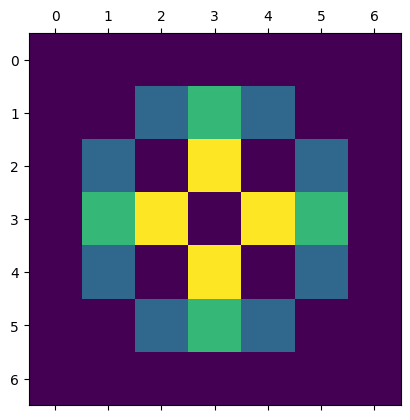

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Primero crearemos una funci√≥n auxiliar que nos ayudar√° para crear el tablero,
# Considerado que esperamos una figura final similar a la de un c√≠rculo

# radio: int -> int
# devuelve la mejor aproximaci√≥n mayor entera de un radio calculado
# seg√∫n un n√∫mero N de casillas en un c√≠rculo
# ejemplo: radio(4)==2
# adem√°s, usaremos la funci√≥n "ceil" del m√≥dulo math para la aproximaci√≥n.

def radio(x):
  pi = math.pi
  rad = math.sqrt(x/pi)
  int_rad = math.ceil(rad)
  return int_rad

# Crearemos otra funci√≥n auxiliar llamada "crear matriz" que genere las matrices de numpy
# De un tama√±o adecuado a lo solicitado
# Y agregando una unidad, tal que siempre haya una celda central

# crear_matriz: int -> array
# toma un radio p, lo hace di√°metro, y crea una matriz de numpy sim√©trica de lado 2p+1 y compuesta por 0's.
def crear_matriz(p):
  diametro_tablero = p*2 +1
  mat_tablero = np.zeros((diametro_tablero,diametro_tablero))
  return (mat_tablero)


#finalmente, creemos arena
def arena(N):
  radio_tab = radio(N)
  diametro_tab = radio_tab*2 +1
  matriz_tab = crear_matriz(radio_tab)
  matriz_tab[radio_tab][radio_tab] +=N
  p=0
  #REVISAR
  # Agrego un iterador lo suficientemente grande para que realice la inspecci√≥n de los elementos la cantidad necesaria de veces.
  #for j in range(0,N):
  ind = (radio_tab,radio_tab)
  while matriz_tab[ind]>=4:
   # A partir de aqu√≠, voy a seleccionar filas para recorrerlas y buscar lo solicitado.
   for k in range(0,diametro_tab):
     fila_tab = matriz_tab[:,k]
     for i in range(0,diametro_tab):
       while fila_tab[i] >=4:
         #arriba
         matriz_tab[i][k-1] +=1
         #abajo
         matriz_tab[i][k+1] +=1
         #izquierda
         matriz_tab[i-1][k] +=1
         #derecha
         matriz_tab[i+1][k] +=1
         #central
         matriz_tab[i][k] -=4
         #contador de iteraciones
         p+=1
         #redefino el √≠ndice asociado al valor m√°ximo de la matriz para seguir con la inspecci√≥n
         ind = np.unravel_index(np.argmax(matriz_tab), (diametro_tab,diametro_tab))
  #Printeamos la cantidad de iteraciones
  print("La cantidad de iteraciones es= "+ str(p))
  #Dibujando
  visualizacion = plt.matshow(matriz_tab)
  plt.show()
  return visualizacion
#0 es moradito
#1 es azul
#2 es verde
#3 es amarillo

#Probemos para N=28
arena(28)

Explique aqu√≠ c√≥mo calcul√≥ el tama√±o que necesita tener el tablero.

En primer lugar, es posible pensar que el peor de los casos es aquel donde quedar√≠a un grano por casillero. Por otro lado, por la forma en que estos se distribuyen en sus ejes cardinales, podemos pensar que la forma se asemejar√≠a cada vez m√°s a un c√≠rculo. Luego, siendo N la cantidad de casilleros en un c√≠rculo, es v√°lido usar la f√≥rmula de √°rea de un c√≠rculo $œÄr^2$ = N.

De esta forma cre√© "radio()", funci√≥n que devuelve la mejor aproximaci√≥n mayor entera de un radio calculado seg√∫n un n√∫mero N de casillas en un c√≠rculo. Adem√°s, us√© la funci√≥n "ceil" del m√≥dulo math para la aproximarlo al n√∫mero entero mayor m√°s cercano, tal que podamos luego transformarlo a cantidad de casillas y el c√≠rculo siempre quede inscrito por dentro de la matriz.
Luego, cre√© "crear matriz()" que genera las matrices de numpy de un tama√±o adecuado a lo solicitado: el doble del radio recientemente calculado, m√°s una unidad (para que siempre haya una celda central)

Ahora ejecute la funci√≥n para $N=128$:

La cantidad de iteraciones es= 342


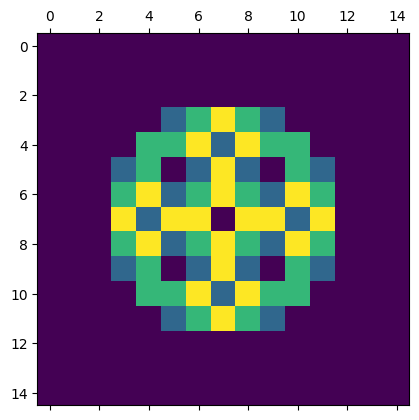

In [ ]:
arena(128)

La cantidad de iteraciones es= 41763


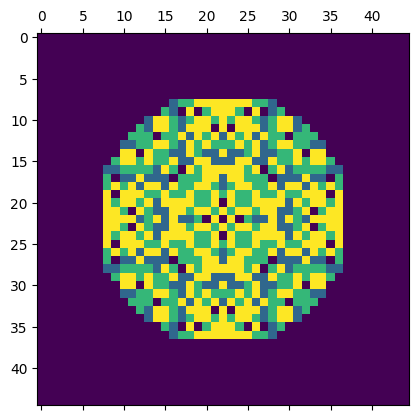

In [ ]:
#N=1500
arena(1500)

In [ ]:
#N=5000
arena(5000)

La cantidad de iteraciones es= 1022122


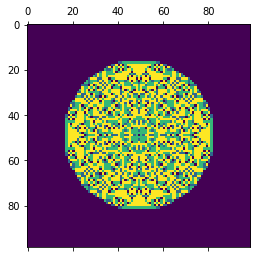

In [ ]:
#N=7500
arena(7500)

A continuaci√≥n ejecute la funci√≥n para el valor m√°s grande de $N$ que consiga alcanzar en un tiempo razonable:

La cantidad de iteraciones es= 1830917


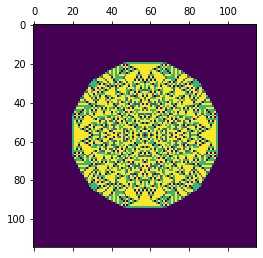

In [ ]:
arena(10000) # reemplace N por el valor m√°ximo que alcanz√≥ a procesar
# N=10000 procesa en 58 segundos aprox

## Parte 2
Observe que cuando en una celda hay un n√∫mero grande de granos de arena, es muy ineficiente ir quit√°ndole de 4 en 4, y ser√≠a mejor quitar de una sola vez lo m√°s que se pueda. Podemos mejorar nuestro programa si cambiamos la regla de distribuci√≥n, y decimos que si en una celda hay un n√∫mero de granos de arena mayor o igual a 4, le quitamos de una sola vez el mayor m√∫ltiplo de 4 posible, y todos esos granos lo repartimos equitativamente entre los vecinos de los cuatro puntos cardinales. Escriba una versi√≥n modificada de su funci√≥n de acuerdo a esta nueva regla.



La cantidad de iteraciones es= 15


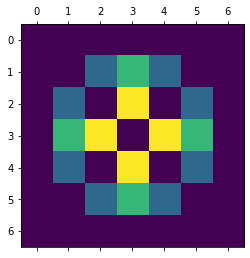

In [ ]:
def arena2(N):
  radio_tab = radio(N)
  diametro_tab = radio_tab*2 +1
  matriz_tab = crear_matriz(radio_tab)
  matriz_tab[radio_tab][radio_tab] +=N
  p=0
  #REVISAR
  #for j in range(0,N):
  ind = (radio_tab,radio_tab)
  while matriz_tab[ind]>=4:
   #selecciono filas
   for k in range(0,diametro_tab):
     fila_tab = matriz_tab[:,k]
     for i in range(0,diametro_tab):
       while fila_tab[i] >=4:
         #arriba
         matriz_tab[i][k-1] +=(4*(fila_tab[i]//4))/4
         #abajo
         matriz_tab[i][k+1] +=(4*(fila_tab[i]//4))/4
         #izquierda
         matriz_tab[i-1][k] +=(4*(fila_tab[i]//4))/4
         #derecha
         matriz_tab[i+1][k] +=(4*(fila_tab[i]//4))/4
         #central
         matriz_tab[i][k] -=(4*(fila_tab[i]//4))
         #contador de iteraciones
         p+=1
         #redefino el √≠ndice asociado al valor m√°ximo de la matriz para seguir con la inspecci√≥n
         ind = np.unravel_index(np.argmax(matriz_tab), (diametro_tab,diametro_tab))
  #Printeamos la cantidad de iteraciones
  print("La cantidad de iteraciones es= "+ str(p))
  #Dibujando
  visualizacion = plt.matshow(matriz_tab)
  plt.show()
  return visualizacion
#0 es moradito
#1 es azul
#2 es verde
#3 es amarillo

#Probemos para N=28
arena2(28)

Ahora ejecute la funci√≥n para $N=128$:

La cantidad de iteraciones es= 227


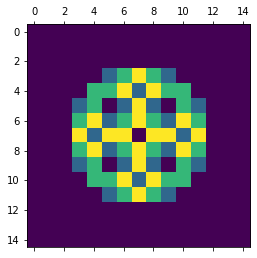

In [ ]:
arena2(128)

La cantidad de iteraciones es= 27377


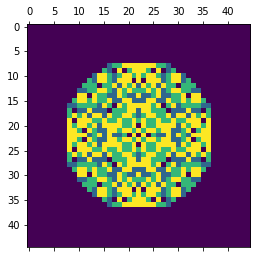

In [ ]:
arena2(1500)

La cantidad de iteraciones es= 307656


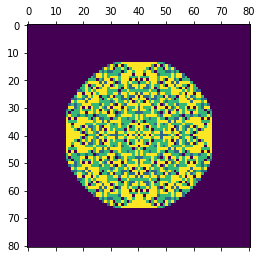

In [ ]:
arena2(5000)

La cantidad de iteraciones es= 665532


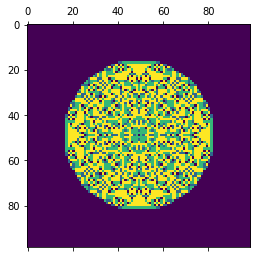

In [ ]:
arena2(7500)

La cantidad de iteraciones es= 1196817


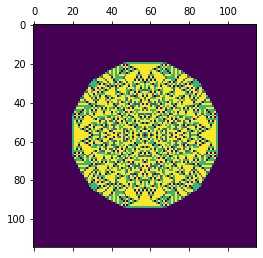

In [ ]:
arena2(10000)

A continuaci√≥n ejecute la funci√≥n para el valor m√°s grande de  ùëÅ  que consiga alcanzar en un tiempo razonable. Note que √©ste n√∫mero no necesariamente es el mismo que para la funci√≥n anterior:

La cantidad de iteraciones es= 1462756


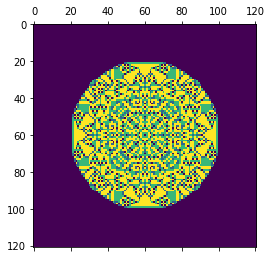

In [ ]:
arena2(11000) # reemplace N por el valor m√°ximo que alcanz√≥ a procesar
#N=11000 procesa en aproximadamente 54s

## Parte 3
Compare a trav√©s de una tabla y un gr√°fico el n√∫mero de aplicaciones de la regla que hace el programa en la Parte 1 y el de la Parte 2, para los distintos valores de $N$ que usted haya calculado.

Discuta si vali√≥ la pena la optimizaci√≥n y discuta tambi√©n (pero no implemente) otras posibles optimizaciones que se le ocurran.

Primero haremos la tabla comparativa entre el n√∫mero de iteraciones asociado tanto a la parte 1 como la parte 2

| Valores de N | Parte 1 | Parte 2 |
| --- | --- | --- |
| 28 | 21 | 15 |
| 1500 | 41.763 | 27.377 |
| 5000 | 466.188 | 307.656 |
| 7500 | 1.022.122 | 665.532 |
| 10000 | 1.830.917 | 1.196.817 |

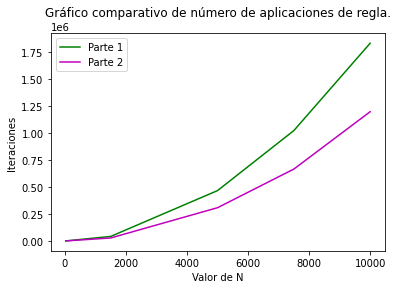

In [ ]:
#Para hacer el gr√°fico comparativo usaremos matplotlib

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#Parte 1: (28,21), (1500,41763), (5000,466188), (7500,1022122), (10000,1830917)
plt.plot([28, 1500, 5000,7500, 10000], [21, 41763, 466188, 1022122, 1830917], color="g", label="Parte 1")
#Parte 2: (28,15), (1500, 27377), (5000,307656), (7500,665532), (10000,1196817)
plt.plot([28, 1500, 5000,7500, 10000], [15, 27377, 307656, 665532, 1196817], color="m", label="Parte 2")
plt.title("Gr√°fico comparativo de n√∫mero de aplicaciones de regla.")
plt.xlabel("Valor de N")
plt.ylabel("Iteraciones")
plt.legend()
plt.show()

#Es posible concluir que la parte 2 se vuelve incluso m√°s eficiente a medida que N aumenta.

A mi parecer la optimizaci√≥n s√≠ vale la pena, especialmente para valores m√°s grandes de N. Esto, pues el c√≥digo actualizado hace que el tiempo de procesamiento sea ligeramente menor y se deban hacer menos iteraciones. Es m√°s eficiente que el inicial.

Otra posible optimizaci√≥n que se me ocurre ser√≠a, dado que el resultado es siempre sim√©trico, solo calcular una cuarta parte del c√≠rculo final. Luego, multiplicar para obtener la distribuci√≥n final.

# Visualizaci√≥n

Para la visualizaci√≥n se recomienda usar arreglos de Numpy y la librer√≠a Matplotlib. A continuaci√≥n un c√≥digo de ejemplo:

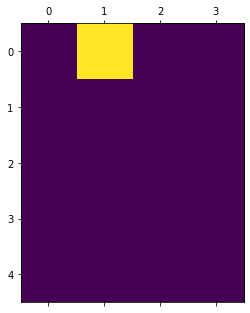

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crea una matriz de numpy llena de ceros de dimensi√≥n 5x4
mat = np.zeros((5,4))

#Asigna un uno en la posici√≥n (0,1) (eje y, eje x)
mat[0][1] = 1

#Dibuja
plt.matshow(mat)
plt.show()

## ¬øQu√© hay que entregar?

Usted debe crear una copia de este documento (del men√∫ seleccionar "Archivo" o "File" y de ahi la opci√≥n "guardar copia en Drive" o "save a copy in Drive"). Este nuevo documento (notebook de Colab) es el que debe modificar para luego compartirlo con la opci√≥n "Cualquier usuario de internet con este enlace puede ver esto" (o ‚ÄúAnyone on the internet with this link can view‚Äù). Esta opci√≥n se encuentra disponible en la parte superior derecha de su notebook, en el bot√≥n "Compartir" (o "Share"). Una vez que tenga disponible el enlace, colocarlo en la descripci√≥n de la entrega de su tarea. No olvide colocar su nombre dentro del notebook.